In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datapath = "Data/global-food-agriculture-statistics/"

crops = pd.read_csv(datapath + "fao_data_crops_data.csv", sep=",", encoding="UTF-8")   

In [3]:
crops.dtypes

country_or_area     object
element_code        object
element             object
year               float64
unit                object
value              float64
value_footnotes     object
category            object
dtype: object

In [4]:
crops.shape

(2255349, 8)

In [5]:
crops

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Americas +,31,Area Harvested,2007.0,Ha,49404.0,A,agave_fibres_nes
1,Americas +,31,Area Harvested,2006.0,Ha,49404.0,A,agave_fibres_nes
2,Americas +,31,Area Harvested,2005.0,Ha,49404.0,A,agave_fibres_nes
3,Americas +,31,Area Harvested,2004.0,Ha,49113.0,A,agave_fibres_nes
4,Americas +,31,Area Harvested,2003.0,Ha,48559.0,A,agave_fibres_nes
...,...,...,...,...,...,...,...,...
2255344,Fc,Calculated Data,NaN,NaN,NaN,NaN,NaN,yautia_cocoyam
2255345,A,"May include official, semi-official or estimat...",NaN,NaN,NaN,NaN,NaN,yautia_cocoyam
2255346,NR,Not reported by country,NaN,NaN,NaN,NaN,NaN,yautia_cocoyam
2255347,F,FAO Estimate,NaN,NaN,NaN,NaN,NaN,yautia_cocoyam


In [6]:
crops.groupby('element_code').count()

,country_or_area,element,year,unit,value,value_footnotes,category
element_code,,,,,,,
111,204568,204568,204568,204568,204568,188064,204568
152,9399,9399,9399,9399,9399,9399,9399
154,9399,9399,9399,9399,9399,9399,9399
31,671153,671153,671153,671153,671153,473111,671153
41,631078,631078,631078,631078,631078,615683,631078
432,9145,9145,9145,9145,9145,9145,9145
434,9145,9145,9145,9145,9145,9145,9145
436,9145,9145,9145,9145,9145,9145,9145
438,9145,9145,9145,9145,9145,9145,9145


We can see that for elements that are not numbers, the data seem to be missing.

In [7]:
crops.loc[crops.element_code == 'FAO Estimate']

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
2401,F,FAO Estimate,NaN,NaN,NaN,NaN,NaN,agave_fibres_nes
11396,F,FAO Estimate,NaN,NaN,NaN,NaN,NaN,almonds_with_shell
20081,F,FAO Estimate,NaN,NaN,NaN,NaN,NaN,anise_badian_fennel_corian
34985,F,FAO Estimate,NaN,NaN,NaN,NaN,NaN,apples
46753,F,FAO Estimate,NaN,NaN,NaN,NaN,NaN,apricots
...,...,...,...,...,...,...,...,...
2194131,F,FAO Estimate,NaN,NaN,NaN,NaN,NaN,walnuts_with_shell
2213221,F,FAO Estimate,NaN,NaN,NaN,NaN,NaN,watermelons
2239308,F,FAO Estimate,NaN,NaN,NaN,NaN,NaN,wheat
2252286,F,FAO Estimate,NaN,NaN,NaN,NaN,NaN,yams


In [8]:
crops.groupby('value_footnotes').count()

,country_or_area,element_code,element,year,unit,value,category
value_footnotes,,,,,,,
A,974473,974473,974473,974473,974473,974473,974473
F,264501,264501,264501,264501,264501,264501,264501
Fc,386744,386744,386744,386744,386744,386744,386744
NR,150249,150249,150249,150249,150249,150249,150249


It seems to be because for those categories of elements, the values are NaN. So let's remove NaN elements. Then we will remove the columns element_code as they don't give us any information more than the column element. 
We can also remove the value_footnotes as they don't help us for our questions. 

In [9]:
crops = crops.drop(columns=['value_footnotes', 'element_code'])

In [10]:
crops = crops.dropna()
crops.shape

(2254385, 6)

In [11]:
crops_droped = crops.copy()
crops_droped.sort_values('value', ascending=False)

,country_or_area,element,year,unit,value,category
455824,World +,Production Quantity,2007.0,tonnes,2.351396e+09,cereals_total
455827,World +,Production Quantity,2004.0,tonnes,2.280834e+09,cereals_total
455826,World +,Production Quantity,2005.0,tonnes,2.267177e+09,cereals_total
455825,World +,Production Quantity,2006.0,tonnes,2.239236e+09,cereals_total
363756,World +,Production Quantity,2007.0,tonnes,2.131753e+09,cereals_rice_milled_eqv
...,...,...,...,...,...,...
1329116,Belize,Yield,1984.0,Hg/Ha,0.000000e+00,onions_inc_shallots_green
1329115,Belize,Yield,1985.0,Hg/Ha,0.000000e+00,onions_inc_shallots_green
1329114,Belize,Yield,1986.0,Hg/Ha,0.000000e+00,onions_inc_shallots_green
1329113,Belize,Yield,1987.0,Hg/Ha,0.000000e+00,onions_inc_shallots_green


Lot of values that are 0: no informations so let's remove them 

In [12]:
crops_droped = crops_droped.loc[crops_droped.value!=0]
crops_droped.sort_values('value', ascending=False)

,country_or_area,element,year,unit,value,category
455824,World +,Production Quantity,2007.0,tonnes,2.351396e+09,cereals_total
455827,World +,Production Quantity,2004.0,tonnes,2.280834e+09,cereals_total
455826,World +,Production Quantity,2005.0,tonnes,2.267177e+09,cereals_total
455825,World +,Production Quantity,2006.0,tonnes,2.239236e+09,cereals_total
363756,World +,Production Quantity,2007.0,tonnes,2.131753e+09,cereals_rice_milled_eqv
...,...,...,...,...,...,...
1245522,Cayman Islands,Production Quantity,2002.0,tonnes,1.000000e+00,oilcrops_primary
1245521,Cayman Islands,Production Quantity,2003.0,tonnes,1.000000e+00,oilcrops_primary
1245520,Cayman Islands,Production Quantity,2004.0,tonnes,1.000000e+00,oilcrops_primary
1245519,Cayman Islands,Production Quantity,2005.0,tonnes,1.000000e+00,oilcrops_primary


### Element

Now let's observe a little bit more what kind of data are given. 

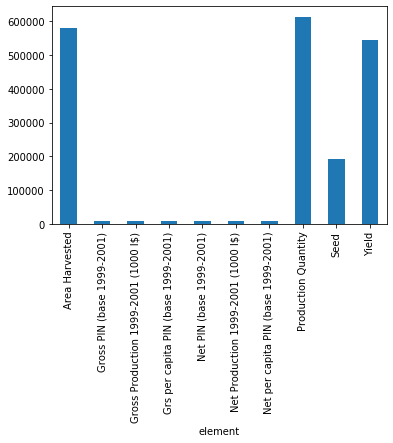

In [13]:
elements = crops_droped.copy()
elements = elements.groupby('element').count()
elements['value'].plot(kind='bar')

In [14]:
crops_droped.loc[crops_droped.element == 'Gross Production 1999-2001 (1000 I$)']

,country_or_area,element,year,unit,value,category
364540,Afghanistan,Gross Production 1999-2001 (1000 I$),2007.0,1000 Int. $,896908.0,cereals_total
364541,Afghanistan,Gross Production 1999-2001 (1000 I$),2006.0,1000 Int. $,718798.0,cereals_total
364542,Afghanistan,Gross Production 1999-2001 (1000 I$),2005.0,1000 Int. $,841895.0,cereals_total
364543,Afghanistan,Gross Production 1999-2001 (1000 I$),2004.0,1000 Int. $,549037.0,cereals_total
364544,Afghanistan,Gross Production 1999-2001 (1000 I$),2003.0,1000 Int. $,685931.0,cereals_total
...,...,...,...,...,...,...
457086,Zimbabwe,Gross Production 1999-2001 (1000 I$),1965.0,1000 Int. $,146260.0,cereals_total
457087,Zimbabwe,Gross Production 1999-2001 (1000 I$),1964.0,1000 Int. $,133822.0,cereals_total
457088,Zimbabwe,Gross Production 1999-2001 (1000 I$),1963.0,1000 Int. $,133981.0,cereals_total
457089,Zimbabwe,Gross Production 1999-2001 (1000 I$),1962.0,1000 Int. $,157101.0,cereals_total


PIN: production index = land needed per unit of crop production in 1961 (in 1961 = 1)\
Gross PIN (base 1999-2001) \
Gross Production 1999-2001 (1000 I$)\
Grs per capita PIN (base 1999-2001) \
Net PIN (base 1999-2001)\
We won't be interested by all of that !! For now we can also remove 'Seed' and 'Yield' \
Hence we only keep Area Harvested and Production Quantity that we separate in 2 tables.

In [15]:
crops_no_interest = crops_droped.loc[~(crops_droped.element=='Area Harvested') & ~(crops_droped.element=='Production Quantity')]
crops_interest = crops_droped.drop(crops_no_interest.index, axis=0)
crops_interest[(crops_interest.unit=='Ha') & (crops_interest.element=='Production Quantity')]

,country_or_area,element,year,unit,value,category


As they don't have the same unit, we need to separate them in 2 different tables.\
Now we can look at the other informations and we will focus on the 'Area Harvested' table, which is the most useful in order to answer our questions. 

In [16]:
crops_area = crops_interest[crops_interest.element=='Area Harvested']
crops_prod = crops_interest[crops_interest.element=='Production Quantity']

### Country or Area 

In [17]:
regions = crops_area.copy()
regions.groupby('country_or_area').count().sort_values('value', ascending=False)

,element,year,unit,value,category
country_or_area,,,,,
World +,7941,7941,7941,7941,7941
Low Income Food Deficit Countries +,7273,7273,7273,7273,7273
Asia +,7228,7228,7228,7228,7228
Net Food Importing Developing Countries +,7030,7030,7030,7030,7030
Americas +,6982,6982,6982,6982,6982
...,...,...,...,...,...
Faroe Islands,94,94,94,94,94
Montenegro,68,68,68,68,68
Marshall Islands,51,51,51,51,51


We can see that the areas with the most entries of values consists in regions of the world such as continents or 'Low Income Deficit Countries'. As they regroup a lot of countries, they are not at the same scale as individual countries and we can separate the 2 categories (Countries vs. areas).

In [18]:
#areas all finish by '+'
crops_continents = regions[[name.endswith('+') for name in regions.country_or_area]]
crops_continents.groupby('country_or_area').count().sort_values(by='value', ascending=False)

,element,year,unit,value,category
country_or_area,,,,,
World +,7941,7941,7941,7941,7941
Low Income Food Deficit Countries +,7273,7273,7273,7273,7273
Asia +,7228,7228,7228,7228,7228
Net Food Importing Developing Countries +,7030,7030,7030,7030,7030
Americas +,6982,6982,6982,6982,6982
Africa +,6655,6655,6655,6655,6655
Least Developed Countries +,6179,6179,6179,6179,6179
South America +,6125,6125,6125,6125,6125
LandLocked developing countries +,6013,6013,6013,6013,6013


In [19]:
crops_countries = regions.drop(crops_continents.index, axis=0)
crops_countries

,country_or_area,element,year,unit,value,category
564,Colombia,Area Harvested,2007.0,Ha,17500.0,agave_fibres_nes
565,Colombia,Area Harvested,2006.0,Ha,17500.0,agave_fibres_nes
566,Colombia,Area Harvested,2005.0,Ha,17500.0,agave_fibres_nes
567,Colombia,Area Harvested,2004.0,Ha,17294.0,agave_fibres_nes
568,Colombia,Area Harvested,2003.0,Ha,17094.0,agave_fibres_nes
...,...,...,...,...,...,...
2255056,"Venezuela, Bolivarian Republic of",Area Harvested,1965.0,Ha,11307.0,yautia_cocoyam
2255057,"Venezuela, Bolivarian Republic of",Area Harvested,1964.0,Ha,11318.0,yautia_cocoyam
2255058,"Venezuela, Bolivarian Republic of",Area Harvested,1963.0,Ha,11328.0,yautia_cocoyam
2255059,"Venezuela, Bolivarian Republic of",Area Harvested,1962.0,Ha,11338.0,yautia_cocoyam


In [20]:
crops_countries.groupby('country_or_area').count().shape

(217, 5)

There are 217 countries listed here. Knowing that there are as of today 195 countries in the world, we will need to consider that over time some countries disappeared, such as USSR.

### Categories of products

Let's just try to observe results for countries individually as the results would be similar for bigger areas. 

In [21]:
category = crops_countries.copy()
category.groupby('category').count().sort_values('value', ascending=False)

,country_or_area,element,year,unit,value
category,,,,,
vegetables_melons_total,8762,8762,8762,8762,8762
roots_and_tubers_total,8692,8692,8692,8692,8692
fruit_excl_melons_total,8506,8506,8506,8506,8506
vegetables_fresh_nes,8471,8471,8471,8471,8471
oilcrops_primary,8067,8067,8067,8067,8067
...,...,...,...,...,...
mate,102,102,102,102,102
kapokseed_in_shell,94,94,94,94,94
kapok_fibre,94,94,94,94,94


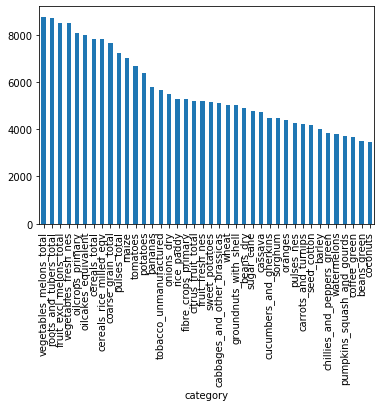

In [22]:
sort_categories = category.groupby('category').count()
sort_categories['value'].sort_values(ascending=False).head(40).plot(kind='bar')

170 different categories of aliments are harvested in countries \
cereal_total, roots_and_tubers_total... all the totals : summary of the rest ? \ 
rest of the aliments are now at pretty similar values 

In [23]:
#we could keep only that : more values and general idea 
crops_indiv = category.copy()
crops_totals = crops_indiv[[name.endswith('_total') for name in crops_indiv['category']]]
crops_indiv = crops_indiv.drop(crops_totals.index, axis=0)
crops_totals.sort_values(by='value', ascending=False)

,country_or_area,element,year,unit,value,category
451919,USSR,Area Harvested,1977.0,Ha,125150000.0,cereals_total
451918,USSR,Area Harvested,1978.0,Ha,123407000.0,cereals_total
451920,USSR,Area Harvested,1976.0,Ha,122679000.0,cereals_total
451932,USSR,Area Harvested,1964.0,Ha,122678116.0,cereals_total
451921,USSR,Area Harvested,1975.0,Ha,122250016.0,cereals_total
...,...,...,...,...,...,...
1720853,Bahrain,Area Harvested,1975.0,Ha,1.0,roots_and_tubers_total
1720830,Bahrain,Area Harvested,1998.0,Ha,1.0,roots_and_tubers_total
1748816,Singapore,Area Harvested,1999.0,Ha,1.0,roots_and_tubers_total
1748817,Singapore,Area Harvested,1998.0,Ha,1.0,roots_and_tubers_total


### Year

Last thing is to study the repartition of data over the years. We will take the data for countries only and for individual products only. 

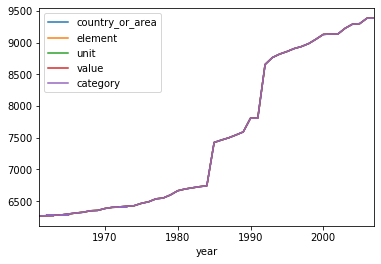

In [24]:
year = crops_indiv.copy()
year.groupby('year').count().sort_values('value', ascending=False).plot()

One can see that the number of data over time is very different from 1961 to 2007. An interesting point could be to know if it is due to the development of data collection in the last years or if the difference of entries is really due to the difference of expansion of agriculture. 

### Start of the Analysis

Now let's start to transform the data. \
We will start by adding the area harvested for a same country, aliment and year.
Let's start by categorizing by countries.

In [27]:
repartition = crops_indiv.copy()
repartition = repartition.set_index(['country_or_area','category','year'])

element unit    value
country_or_area category         year                                
Colombia        agave_fibres_nes 2007.0  Area Harvested   Ha  17500.0
                                 2006.0  Area Harvested   Ha  17500.0
                                 2005.0  Area Harvested   Ha  17500.0
                                 2004.0  Area Harvested   Ha  17294.0
                                 2003.0  Area Harvested   Ha  17094.0
                                 2002.0  Area Harvested   Ha  17391.0
                                 2001.0  Area Harvested   Ha  16802.0
                                 2000.0  Area Harvested   Ha  17987.0
                                 1999.0  Area Harvested   Ha  17098.0
                                 1998.0  Area Harvested   Ha  18311.0
                                 1997.0  Area Harvested   Ha  20995.0
                                 1996.0  Area Harvested   Ha  22176.0
                                 1995.0  Area Harvested   Ha  18153.0
                                 1994.0  Area Harvested   Ha  15388.0
                                 1993.0  Area Harvested   Ha  16006.0
                                 1992.0  Area Harvested   Ha  14663.0
                                 1991.0  Area Harvested   Ha  17096.0
                                 1990.0  Area Harvested   Ha  15576.0
                                 1989.0  Area Harvested   Ha  20770.0
                                 1988.0  Area Harvested   Ha  19540.0